In [3]:
import numpy as np
import pandas as pd
import math
import os


## Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import zscore, norm, randint
import warnings; warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)

# Import Data and Overview

In [4]:
## Importing the csv file to Pandas DataFrame
df = pd.read_csv("flight_data.csv")
df.head()

,airlines,Date,Month,Year,Weekday,Dep_Time,Ar_Time,depr_Citie,Ar_Citie,Travel_Time,Airline_Cabin,no_stops,Price,timestamp,avg_Price,min_Price
0,IndiGo,1,1,2022,5,05:15,07:50,jaipur,Bengaluru,2h 35m,E,direct,7203,20211230-1158,7911.4,6203
1,IndiGo,1,1,2022,5,22:20,01:00,jaipur,Bengaluru,2h 40m,E,direct,7679,20211230-1158,7911.4,6203
2,IndiGo,1,1,2022,5,04:50,10:35,jaipur,Bengaluru,5h 45m,E,1 stop,7688,20211230-1158,7911.4,6203
3,IndiGo,1,1,2022,5,14:15,20:35,jaipur,Bengaluru,6h 20m,E,1 stop,7736,20211230-1158,7911.4,6203
4,IndiGo,1,1,2022,5,14:10,20:55,jaipur,Bengaluru,6h 45m,E,1 stop,7946,20211230-1158,7911.4,6203


In [6]:
## Statical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,12497.0,15.668000,8.698884,1.0,8.000000,16.000000,23.000000,31.000000
Month,12497.0,3.511163,1.704824,1.0,2.000000,3.000000,5.000000,6.000000
Year,12497.0,2022.000000,0.000000,2022.0,2022.000000,2022.000000,2022.000000,2022.000000
Weekday,12497.0,2.995359,2.025481,0.0,1.000000,3.000000,5.000000,6.000000
Price,12497.0,6466.638073,24429.783448,452.0,2332.000000,2965.000000,4006.000000,773480.000000
avg_Price,12497.0,6466.638073,5821.276907,2012.6,2961.866667,5807.733333,8111.266667,59491.533333
min_Price,12497.0,2791.932704,1032.310513,452.0,1939.000000,2668.000000,3238.000000,7628.000000


In [7]:
df.shape

(12497, 16)

- So no. of rows are greater than 12000+ and columns is 16 col

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   airlines       12497 non-null  object 
 1   Date           12497 non-null  int64  
 2   Month          12497 non-null  int64  
 3   Year           12497 non-null  int64  
 4   Weekday        12497 non-null  int64  
 5   Dep_Time       12497 non-null  object 
 6   Ar_Time        12497 non-null  object 
 7   depr_Citie     12497 non-null  object 
 8   Ar_Citie       12497 non-null  object 
 9   Travel_Time    12497 non-null  object 
 10  Airline_Cabin  12497 non-null  object 
 11  no_stops       12497 non-null  object 
 12  Price          12497 non-null  int64  
 13  timestamp      12497 non-null  object 
 14  avg_Price      12497 non-null  float64
 15  min_Price      12497 non-null  int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 1.5+ MB


In [9]:
df["airlines"].value_counts()

IndiGo                        5858
Air India                     2389
GoFirst                       2189
AirAsia India                 1201
SpiceJet                       724
Train                           20
Vistara, Air India              19
IndiGo, Vistara                 16
Vistara, IndiGo                 11
Vistara, AirAsia India          11
AirAsia India, SpiceJet         10
SpiceJet, IndiGo                10
SpiceJet, Vistara                8
AirAsia India, Vistara           6
GoFirst, SpiceJet                4
GoFirst, Air India               4
SpiceJet, Alaska Seaplanes       3
SpiceJet, GoFirst                2
IndiGo, AirAsia India            2
IndiGo, SpiceJet                 2
AirAsia India, GoFirst           1
Vistara, SpiceJet                1
Multiple Airlines                1
GoFirst, IndiGo                  1
AirAsia India, IndiGo            1
SpiceJet, Air India              1
IndiGo, GoFirst                  1
Air India, SpiceJet              1
Name: airlines, dtyp

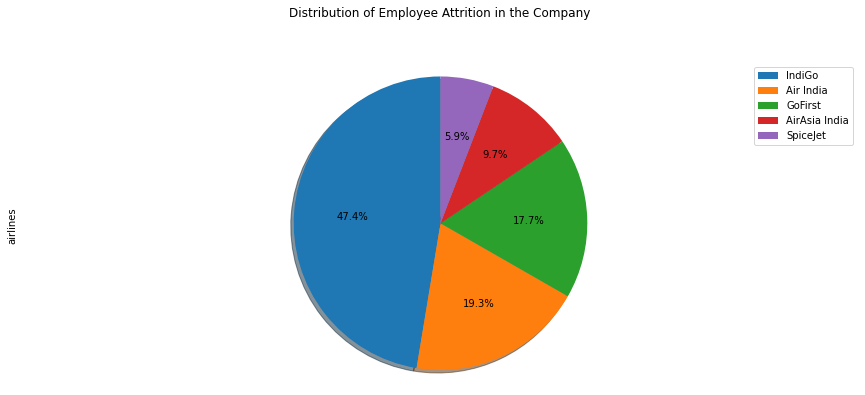

In [10]:
labels= df['airlines'].value_counts().index[0:5]
df['airlines'].astype(str).value_counts()[0:5].plot(kind='pie',
                                               figsize=(15,6),
                                               autopct='%1.1f%%',
                                               startangle=90,
                                               shadow=True,
                                               labels=None)
plt.title('Distribution of Employee Attrition in the Company',y=1.12)
plt.axis('equal')
# add Legend
plt.legend(labels=labels,loc='upper right')
#show plot
plt.show()

- Approx. 98.91173881731615 % of flights belongs to top 5 airline companies - `IndiGo`, `Air India`, `GoFirst`, `AirAsia India`, `SpiceJet` and rest are multiple airlines 

In [11]:
df["Month"].value_counts()

3    2205
5    2141
6    2079
1    2079
4    2010
2    1983
Name: Month, dtype: int64

In [12]:
df["Year"].value_counts()

2022    12497
Name: Year, dtype: int64

In [13]:
df["Weekday"].value_counts()

6    1883
0    1875
4    1802
2    1790
1    1755
5    1708
3    1684
Name: Weekday, dtype: int64

In [14]:
df["depr_Citie"].value_counts()

jaipur       10034
Hyderabad     2463
Name: depr_Citie, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

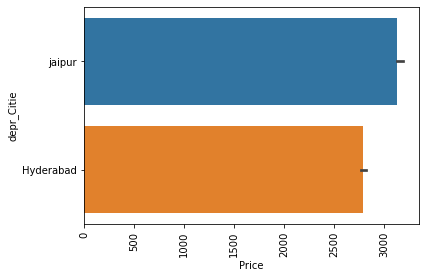

In [15]:
# Visualizing Relationship between Price & depr_Citie.

sns.barplot(x="Price", y="depr_Citie",data=df,estimator=np.median)
plt.xticks(rotation=90)

In [16]:
df["Ar_Citie"].value_counts()

mumbai       2697
new delhi    2673
Jaipur       2463
chennai      2418
Bengaluru    2246
Name: Ar_Citie, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

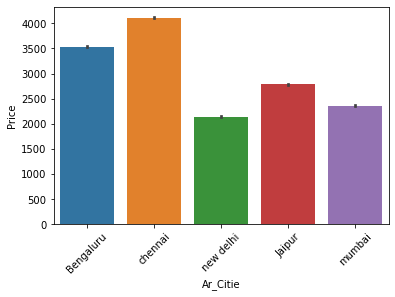

In [17]:
# Visualizing Relationship between Price & Ar_Citie.

sns.barplot(x="Ar_Citie", y="Price",data=df,estimator=np.median)
plt.xticks(rotation=45)

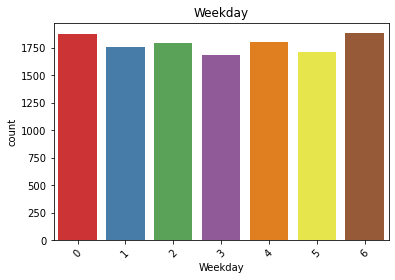

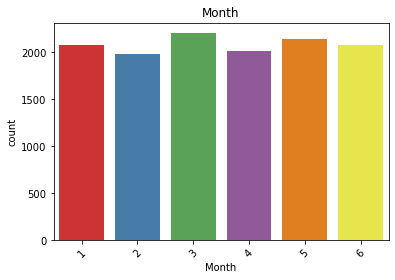

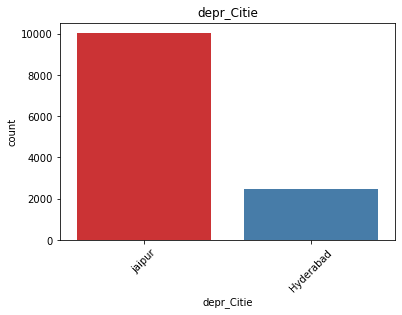

In [18]:
### Finding out the relationship between categorical features and Price ticket

cat_feats = ["Weekday","Month","depr_Citie"]

for feat in cat_feats:

    sns.countplot(x=feat,data=df,palette="Set1")

    #Rotate x-labels
    plt.xticks(rotation=45)   
    plt.xlabel(feat)
    plt.ylabel('count')
    plt.title(feat)
    plt.show()


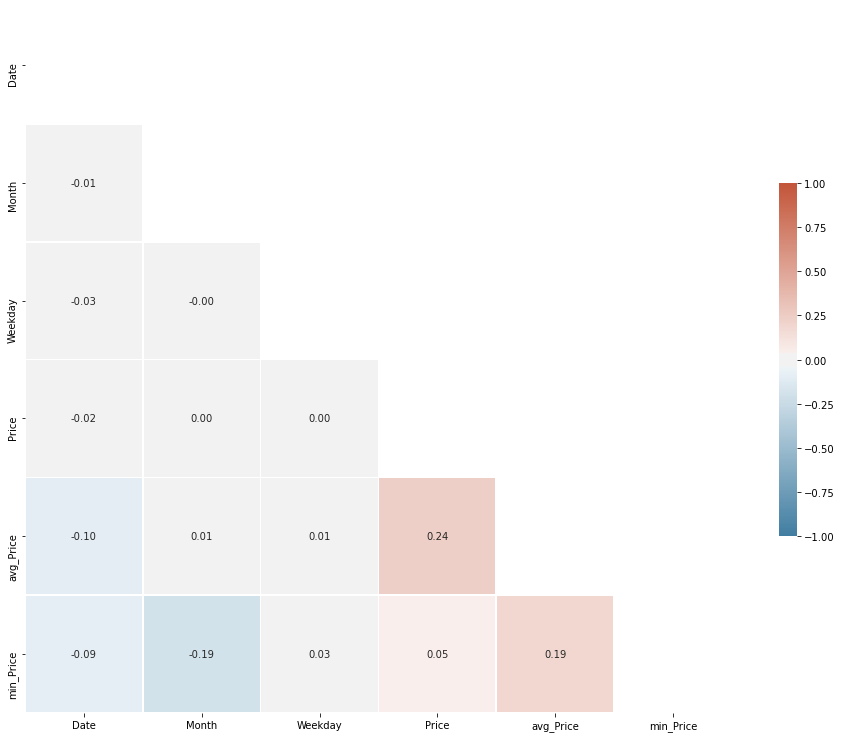

In [5]:
import seaborn as sns

corr = df.drop(labels=['Year'], axis= 1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(17, 13))
cmap = sns.diverging_palette(235, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1.0, vmin=-1.0,
           square=True, linewidths=.5, annot=True, fmt='.2f', cbar_kws={'shrink': .5})

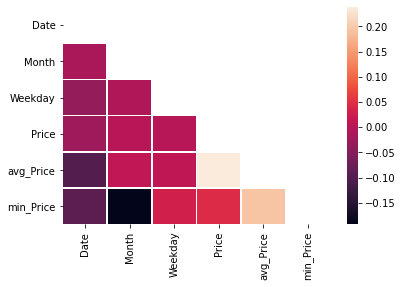

In [19]:
corr = df.drop(labels=['Year'], axis= 1).corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask,  linewidths = .5 )#, annot = True)

In [20]:
df.head()

,airlines,Date,Month,Year,Weekday,Dep_Time,Ar_Time,depr_Citie,Ar_Citie,Travel_Time,Airline_Cabin,no_stops,Price,timestamp,avg_Price,min_Price
0,IndiGo,1,1,2022,5,05:15,07:50,jaipur,Bengaluru,2h 35m,E,direct,7203,20211230-1158,7911.4,6203
1,IndiGo,1,1,2022,5,22:20,01:00,jaipur,Bengaluru,2h 40m,E,direct,7679,20211230-1158,7911.4,6203
2,IndiGo,1,1,2022,5,04:50,10:35,jaipur,Bengaluru,5h 45m,E,1 stop,7688,20211230-1158,7911.4,6203
3,IndiGo,1,1,2022,5,14:15,20:35,jaipur,Bengaluru,6h 20m,E,1 stop,7736,20211230-1158,7911.4,6203
4,IndiGo,1,1,2022,5,14:10,20:55,jaipur,Bengaluru,6h 45m,E,1 stop,7946,20211230-1158,7911.4,6203


In [22]:
dates = df['Date']
Months = df["Month"]
Year = df["Year"]


In [23]:
date_time = []
for d,m,y in zip(dates, Months, Year):
    date_time.append(pd.to_datetime(str(y)+'-' +str(m)+'-' +str(d)))

In [24]:
df["depr_date_time"] = date_time

In [25]:
df.head()


,airlines,Date,Month,Year,Weekday,Dep_Time,Ar_Time,depr_Citie,Ar_Citie,Travel_Time,Airline_Cabin,no_stops,Price,timestamp,avg_Price,min_Price,depr_date_time
0,IndiGo,1,1,2022,5,05:15,07:50,jaipur,Bengaluru,2h 35m,E,direct,7203,20211230-1158,7911.4,6203,2022-01-01
1,IndiGo,1,1,2022,5,22:20,01:00,jaipur,Bengaluru,2h 40m,E,direct,7679,20211230-1158,7911.4,6203,2022-01-01
2,IndiGo,1,1,2022,5,04:50,10:35,jaipur,Bengaluru,5h 45m,E,1 stop,7688,20211230-1158,7911.4,6203,2022-01-01
3,IndiGo,1,1,2022,5,14:15,20:35,jaipur,Bengaluru,6h 20m,E,1 stop,7736,20211230-1158,7911.4,6203,2022-01-01
4,IndiGo,1,1,2022,5,14:10,20:55,jaipur,Bengaluru,6h 45m,E,1 stop,7946,20211230-1158,7911.4,6203,2022-01-01


In [26]:
df['depr_date_time'] = df['depr_date_time'].apply(pd.to_datetime)


In [27]:
df.set_index('depr_date_time', inplace=True)


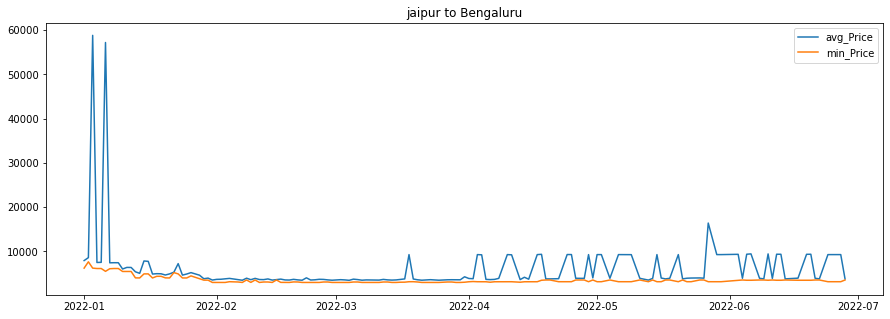

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df[(df['depr_Citie'] == 'jaipur') & (df['Ar_Citie'] == 'Bengaluru')]['avg_Price'], label = 'avg_Price')
plt.plot(df[(df['depr_Citie'] == 'jaipur') & (df['Ar_Citie'] == 'Bengaluru')]['min_Price'], label = 'min_Price')
plt.legend()
plt.title("jaipur to Bengaluru")
plt.show()


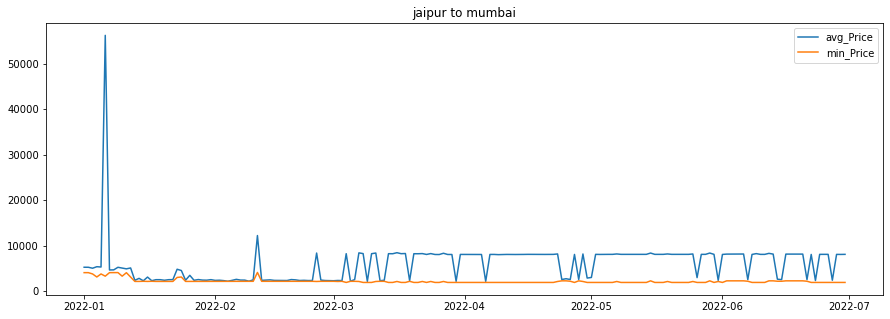

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df[(df['depr_Citie'] == 'jaipur') & (df['Ar_Citie'] == 'mumbai')]['avg_Price'], label = 'avg_Price')
plt.plot(df[(df['depr_Citie'] == 'jaipur') & (df['Ar_Citie'] == 'mumbai')]['min_Price'], label = 'min_Price')
plt.legend()
plt.title("jaipur to mumbai")
plt.show()


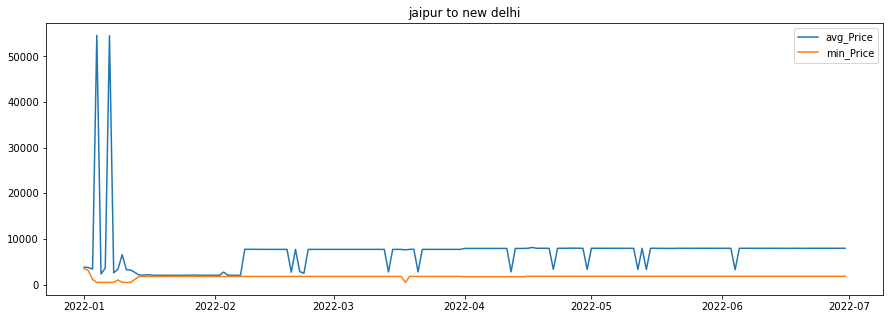

In [30]:
plt.figure(figsize=(15,5))
plt.plot(df[(df['depr_Citie'] == 'jaipur') & (df['Ar_Citie'] == 'new delhi')]['avg_Price'], label = 'avg_Price')
plt.plot(df[(df['depr_Citie'] == 'jaipur') & (df['Ar_Citie'] == 'new delhi')]['min_Price'], label = 'min_Price')
plt.legend()
plt.title("jaipur to new delhi")
plt.show()


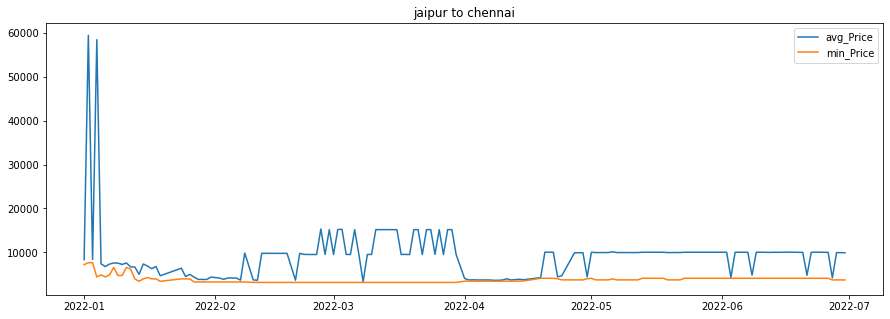

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df[(df['depr_Citie'] == 'jaipur') & (df['Ar_Citie'] == 'chennai')]['avg_Price'], label = 'avg_Price')
plt.plot(df[(df['depr_Citie'] == 'jaipur') & (df['Ar_Citie'] == 'chennai')]['min_Price'], label = 'min_Price')
plt.legend()
plt.title("jaipur to chennai")
plt.show()
